In [22]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
pd_pageview=pd.read_csv('/Users/yuertang/Desktop/DataFest/data/page_views.csv')

/var/folders/s8/_l25g4l10y7725mc4fmr9mpm0000gn/T/ipykernel_1517/2413379758.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_pageview=pd.read_csv('/Users/yuertang/Desktop/DataFest/data/page_views.csv')


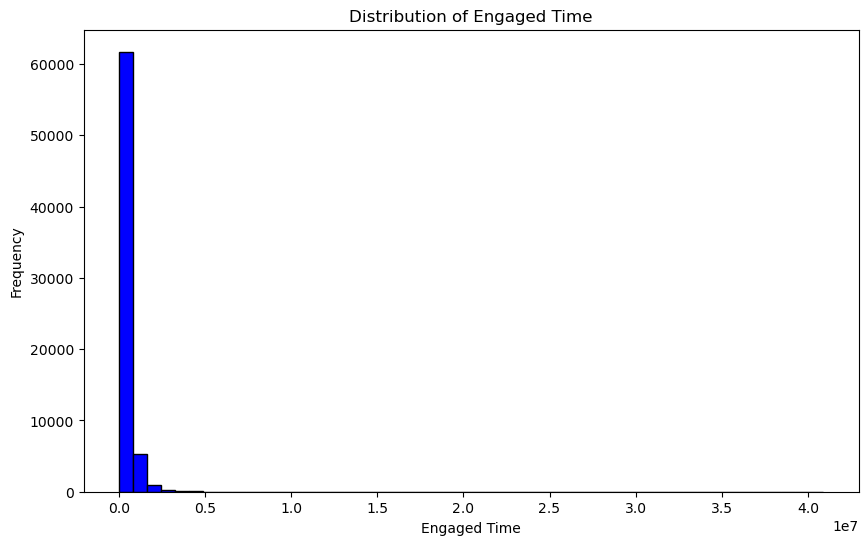

In [5]:
# Examine the distribution of 'engaged_time'
plt.figure(figsize=(10, 6))
plt.hist(pd_pageview['engaged'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Engaged Time')
plt.xlabel('Engaged Time')
plt.ylabel('Frequency')
plt.show()

Correlation between engaged time and tried again clicks: 0.03970809514785426


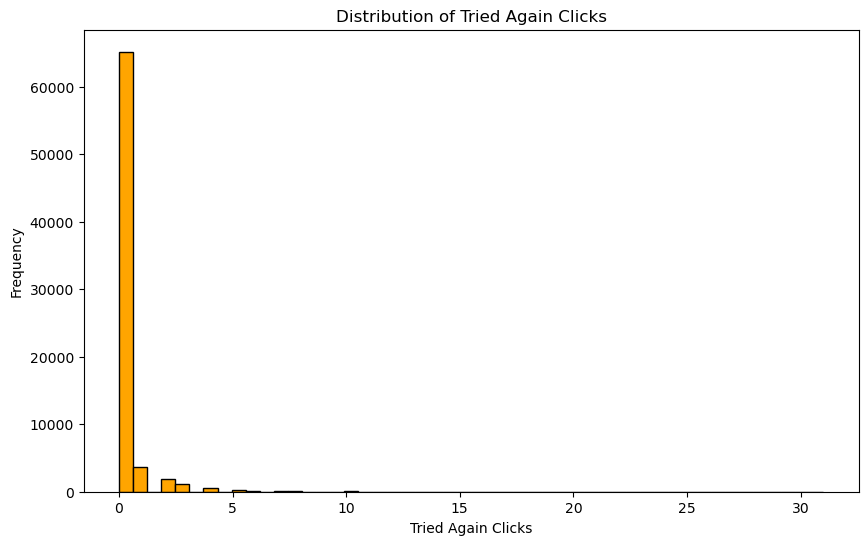

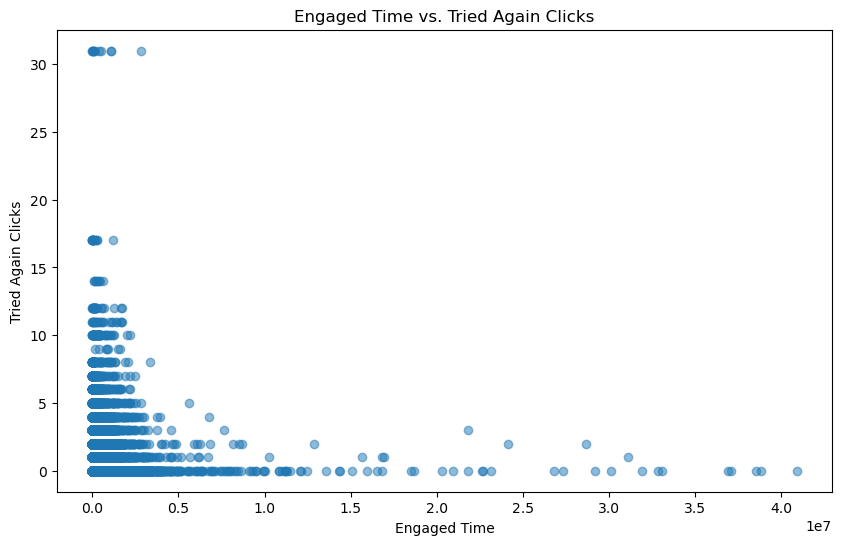

In [14]:
# Assuming you have a DataFrame 'df' with both 'engaged_time' and 'tried_again_clicks'.

# Check the correlation
correlation = pd_pageview['engaged'].corr(pd_pageview['tried_again_clicks'])
print(f"Correlation between engaged time and tried again clicks: {correlation}")

# Visualize the distribution of 'tried_again_clicks'
plt.figure(figsize=(10, 6))
plt.hist(pd_pageview['tried_again_clicks'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Tried Again Clicks')
plt.xlabel('Tried Again Clicks')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between the two variables
plt.figure(figsize=(10, 6))
plt.scatter(pd_pageview['engaged'], pd_pageview['tried_again_clicks'], alpha=0.5)
plt.title('Engaged Time vs. Tried Again Clicks')
plt.xlabel('Engaged Time')
plt.ylabel('Tried Again Clicks')
plt.show()


Both "engaged" and "tried_again_clicks" have similar distribution pattern, specifically:
1. high frequency of low values
2. long tail indicating fewer instances of higer values

--> indicating that most students only click to try again a few times

--> the scatter plot indicating taht there is no strong linear correlation with the two variables

    --> indicate:
        1. "engaged" and "tried" measure two dimension of engagement, one for the duration of focus on content and the other reflect persistence/ willingness to re-enageg with the content
        2. such behaviors are not widespread
        3. potential investigation hint on outliers: 1. highly engaged student? 还是2. misuse?

        

## Combining


combining "enaged" and "tried_again_clicks"


In [10]:
from scipy.stats import zscore

# Assuming 'df' is your DataFrame and it contains 'engaged_time' and 'tried_again_clicks'.

# Standardize the variables using z-scores
pd_pageview['z_engaged_time'] = zscore(pd_pageview['engaged'])
pd_pageview['z_tried_again_clicks'] = zscore(pd_pageview['tried_again_clicks'])

# Create a composite index by summing the z-scores
# If you want to weight them, multiply by the weight before summing
pd_pageview['engagement_index'] = pd_pageview['z_engaged_time'] + pd_pageview['z_tried_again_clicks']

# Interpretation
# You can set thresholds to identify highly engaged or disengaged students
# For example, you might consider students with an engagement index in the top 10% to be highly engaged
high_engagement_threshold = pd_pageview['engagement_index'].quantile(0.90)
highly_engaged_students = pd_pageview[pd_pageview['engagement_index'] > high_engagement_threshold]



In [30]:
import pandas as pd
from scipy.stats import zscore

# Load the dataset
df = pd.read_csv('/Users/yuertang/Desktop/DataFest/data/page_views.csv', low_memory=False)

df['was_complete'] = df['was_complete'].fillna(0).astype(int)

# Option 2: Drop rows where 'was_complete' is NaN before attempting conversion
df = df.dropna(subset=['was_complete'])
df['was_complete'] = df['was_complete'].astype(int)


# Ensure 'engaged' and 'tried_again_clicks' are numeric
df['engaged'] = pd.to_numeric(df['engaged'], errors='coerce')
df['tried_again_clicks'] = pd.to_numeric(df['tried_again_clicks'], errors='coerce')

# Drop rows with NaN values in these columns, if any, after the conversion
df = df.dropna(subset=['engaged', 'tried_again_clicks', 'was_complete'])

# Calculate z-scores for the continuous variables for standardization
df['z_engaged'] = zscore(df['engaged'])
df['z_tried_again_clicks'] = zscore(df['tried_again_clicks'])

# Combine the variables into a single response variable
df['engagement_score'] = df['z_engaged'] + df['z_tried_again_clicks'] + df['was_complete']

# Display the first few rows to confirm
df[['engaged', 'tried_again_clicks', 'was_complete', 'engagement_score']]


,engaged,tried_again_clicks,was_complete,engagement_score
0,10857.0,0,0,-0.641098
1,620302.0,0,0,0.155555
2,793964.0,0,1,1.382563
3,6250.0,0,0,-0.647120
4,30885.0,0,1,0.385082
...,...,...,...,...
73104,212398.0,0,0,-0.377648
73105,6511.0,0,1,0.353221
73106,295702.0,0,0,-0.268755
73107,2201.0,0,1,0.347587


# Checking engagemeny_score

## Correlation Analysis with raw variable


In [36]:

correlations = df[['engaged', 'tried_again_clicks', 'was_complete', 'engagement_score']].corr()

print(correlations)


                     engaged  tried_again_clicks  was_complete  \
engaged             1.000000            0.039708     -0.159364   
tried_again_clicks  0.039708            1.000000      0.157974   
was_complete       -0.159364            0.157974      1.000000   
engagement_score    0.213010            0.665549      0.488271   

                    engagement_score  
engaged                     0.213010  
tried_again_clicks          0.665549  
was_complete                0.488271  
engagement_score            1.000000  


## Predictive Validity

No, We don't have final grade so we cannot run predictive validity

## Data Visualization

/opt/anaconda3/envs/gao_lab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


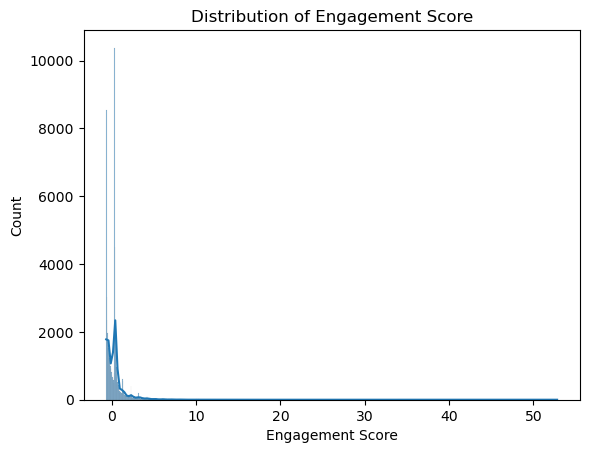

KeyError: 'final_grade'

<Figure size 1000x600 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the engagement score
sns.histplot(df['engagement_score'], kde=True)
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.show()

# Scatter plot of engagement score vs. final grade
plt.figure(figsize=(10, 6))
plt.scatter(df['engagement_score'], df['final_grade'], alpha=0.5)
plt.title('Engagement Score vs Final Grade')
plt.xlabel('Engagement Score')
plt.ylabel('Final Grade')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


**Correlation Analysis**

The moderate correlations between engaged, tried_again_clicks, and the engagement_score imply that **both variables do contribute information to the composite score**, but not so strongly that they are duplicating information.

The fact that **tried_again_clicks has a higher correlation** with the engagement_score than engaged suggests that it may be a stronger indicator of engagement in your composite metric.

The positive, albeit weakest, correlation of was_complete with the engagement_score suggests that completing a page does contribute to the overall engagement picture but not as strongly as the other factors. *Will this be a problem?*


**Data Visualization (Histogram)**
The right-skewed distribution indicates most students have low engagement scores, with fewer students showing high engagement. This could mean that your engagement metric is sensitive to detecting high engagement, but it might be overemphasizing low engagement.

The presence of a peak near zero suggests that many students have minimal engagement scores, which might mean that the metric is somewhat biased towards lower engagement or that there is a genuine lack of engagement among a significant portion of students.

## improvement 1 
1. add weight on "was_complete"
2. log to normalize before standardization

In [37]:
import numpy as np

# Log transformation to reduce skewness (adding 1 to avoid log(0))
df['log_engaged'] = np.log1p(df['engaged'])
df['log_tried_again_clicks'] = np.log1p(df['tried_again_clicks'])

# Standardizing the log-transformed variables
df['z_log_engaged'] = zscore(df['log_engaged'])
df['z_log_tried_again_clicks'] = zscore(df['log_tried_again_clicks'])

# Assume you want to double the weight for 'was_complete' as a stronger indicator
weight_was_complete = 2
df['engagement_score'] = (df['z_log_engaged'] +
                          df['z_log_tried_again_clicks'] +
                          weight_was_complete * df['was_complete'])

# Display the first few rows to confirm
df[['log_engaged', 'log_tried_again_clicks', 'was_complete', 'engagement_score']].head()

,log_engaged,log_tried_again_clicks,was_complete,engagement_score
0,9.292657,0.0,0,-1.195539
1,13.337963,0.0,0,0.665099
2,13.584795,0.0,1,2.778629
3,8.740497,0.0,0,-1.449506
4,10.338058,0.0,1,1.285293


In [39]:
correlations_2 = df[['log_engaged', 'log_tried_again_clicks', 'was_complete', 'engagement_score']].corr()

print(correlations_2)

                        log_engaged  log_tried_again_clicks  was_complete  \
log_engaged                1.000000                0.062714     -0.353954   
log_tried_again_clicks     0.062714                1.000000      0.196003   
was_complete              -0.353954                0.196003      1.000000   
engagement_score           0.433419                0.754253      0.488271   

                        engagement_score  
log_engaged                     0.433419  
log_tried_again_clicks          0.754253  
was_complete                    0.488271  
engagement_score                1.000000  


/opt/anaconda3/envs/gao_lab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


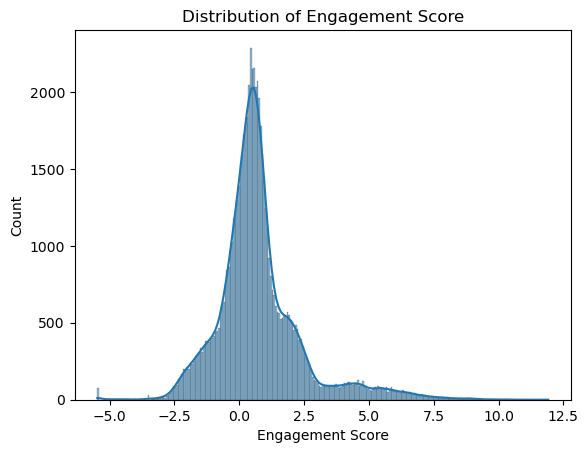

KeyError: 'final_grade'

<Figure size 1000x600 with 0 Axes>

In [38]:
sns.histplot(df['engagement_score'], kde=True)
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.show()

# Scatter plot of engagement score vs. final grade
plt.figure(figsize=(10, 6))
plt.scatter(df['engagement_score'], df['final_grade'], alpha=0.5)
plt.title('Engagement Score vs Final Grade')
plt.xlabel('Engagement Score')
plt.ylabel('Final Grade')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

## Improvement 2

The correlatio between new response variable and raw variable can be improved
Consider dealing with skewness of "engaed" and "tried_by_clicks" before standardization